In [5]:
import pandas as pd 
import numpy as np
from collections import Counter

In [6]:
import sys
sys.path.insert(1, '../oracle-polimi-contest-2019')
from evaluation_script import read_file

In [7]:
from tqdm._tqdm_notebook import tqdm_notebook as tqdm

tqdm.pandas()

In [8]:
train = read_file("../oracle-polimi-contest-2019/entity-resolution_advanced-topics-training_data.csv")
test = read_file("../oracle-polimi-contest-2019/test_data.csv")

In [9]:
train = train.drop(['record_id','modification', 'type'], axis=1)
test = test.drop(['record_id','modification', 'type'], axis=1)
train['name'] = train['name'].str.lower()
train

,name,address,phone,email,linked_id
0,ardia enterprisesmltd.,NaN,+4102971003602,imquires@zoho.vo,10111147
1,andré almeida blanco,la Rua Pelotas; 209; apartamento 72; Bloco A; ...,NaN,NaN,12172071
2,moonta holdings ltd.,NaN,+65013464145,NaN,10104491
3,springfield investments group limited,NaN,NaN,consulting@zoho.de,10068808
4,grigory uvarov,127273; MOSCOW; OTRADNAJA STREET; HOUSE 2; NO....,NaN,NaN,13011715
5,odin group investments s.a.,NaN,+49668906658,info@outlook.cz,10105687
6,capri solutions limited,NaN,NaN,help@CAPRI.SOLUTIONS.LxMITED.de,10016805
7,crossmatch s.a.,"Akara building 24 De Castro Street, Wickham Ca...",NaN,CrossmatchSA@aol.gov,12133421
8,laurence pountney ltd,Akara Building 24 De Castro St; Wickham Cay I;...,NaN,support@LAURENCE.POUNTNEY.LTD.gov,12126772
9,"breit, marcus",NaN,+440180275310,NaN,11002523


# Check for duplicated values

In [78]:
train.shape

(691440, 5)

In [80]:
dup = train[train.duplicated(subset=None, keep='first')]
dup.shape

(98316, 5)

In [81]:
# Without linked_id
train[train.drop('linked_id', axis=1).duplicated(subset=None, keep='first')].shape

(101452, 5)

### how many duplicates considering test set too?

In [82]:
test

,name,address,phone,email
0,CHEYHAM CORPORATION LIMITED,NaN,+19865374390,sales@protonmail.com
1,MEABIZ LIMITED,NaN,+337403339169,NaN
2,CHAMPLE INVESTMENTS LTD.,NaN,+4142094239081,NaN
3,Concept I Media and Technology Company Limited,NaN,+14803535251,NaN
4,ARRA RESOURCES LIMITED,NaN,+420762950520,NaN
5,RONCO INVESTMENT ESTATES CORP.,NaN,+332637199890,NaN
6,MIREN ENTERPRISES S.A.,NaN,NaN,MIRENENTERPRISESSA@outlook.it
7,WHITE CONCEPT GROUP LIMITED,NaN,+18013438855,NaN
8,ZHANG ZI TONG,No. 102; Unit 11; 5th Floor; Tu Er hu tong; Do...,+420977095071,ZHANGZITONG@icloud.de
9,FRESHCAM CORP.,NaN,NaN,NaN


In [83]:
full_df = pd.concat([train.drop('linked_id', axis=1), test])
full_df.shape

(958395, 4)

In [85]:
full_df

,name,address,phone,email
0,ardia enterprisesmltd.,NaN,+4102971003602,imquires@zoho.vo
1,andré almeida blanco,la Rua Pelotas; 209; apartamento 72; Bloco A; ...,NaN,NaN
2,moonta holdings ltd.,NaN,+65013464145,NaN
3,springfield investments group limited,NaN,NaN,consulting@zoho.de
4,grigory uvarov,127273; MOSCOW; OTRADNAJA STREET; HOUSE 2; NO....,NaN,NaN
5,odin group investments s.a.,NaN,+49668906658,info@outlook.cz
6,capri solutions limited,NaN,NaN,help@CAPRI.SOLUTIONS.LxMITED.de
7,crossmatch s.a.,"Akara building 24 De Castro Street, Wickham Ca...",NaN,CrossmatchSA@aol.gov
8,laurence pountney ltd,Akara Building 24 De Castro St; Wickham Cay I;...,NaN,support@LAURENCE.POUNTNEY.LTD.gov
9,"breit, marcus",NaN,+440180275310,NaN


In [84]:
full_df[full_df.duplicated(subset=None, keep='first')].shape

(109890, 4)

# Name 

In [6]:
count_values = train['name'].value_counts()

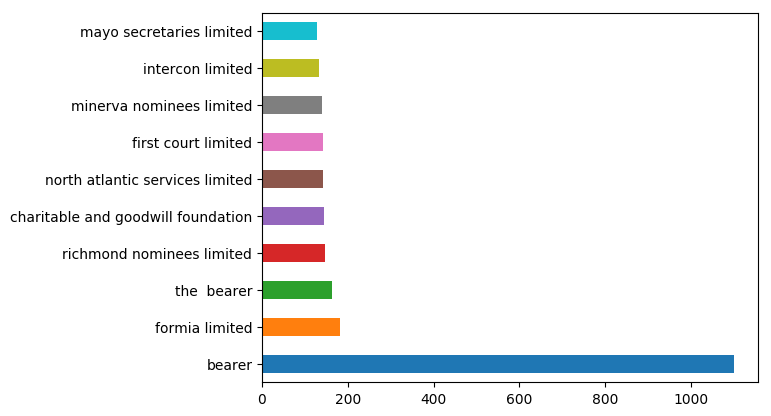

In [29]:
count_values[:10].plot.barh()

In [ ]:
# Since lots of names are 'bearer' but refer to different linked_id, use specific approach to bearer case

In [8]:
# Count occurrences of each word
from collections import Counter

names = list(train.name.astype(str).values)
unique_names = list(set(names))
all_names = ' '.join(unique_names)
words = list(all_names.split(' '))

most_common_words = Counter(words).most_common()
#most_common_words

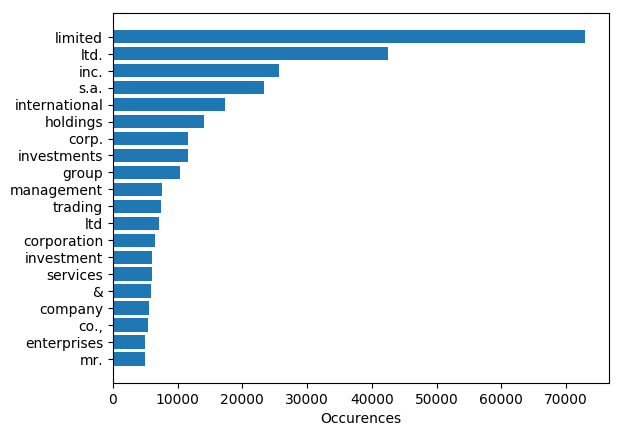

In [9]:
import matplotlib.pyplot as plt

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
word = [x[0] for x in most_common_words[:20]]
y_pos = np.arange(len(word))

occurrences = np.array([x[1] for x in most_common_words[:20]])
ax.barh(y_pos, occurrences , align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(word)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Occurences')

plt.show()

 ### Where is bearer?

In [11]:
dict_most_common = dict(most_common_words)
dict_most_common['bearer']

206

# Phone

In [12]:
train['phone'].value_counts()

+4120046828984    10
+338575880868      9
+14183960626       9
+49950790096       9
+14677912072       9
+449617515083      9
+337366448835      9
+3973968219        9
+3937148562        9
+3974063124        9
+420837423324      9
+3954432621        9
+336675226659      8
+339242752104      8
+332761816356      8
+4128143778524     8
+420688658346      8
+336687534465      8
+331638613404      8
+11961904654       8
+3918638433        8
+49360188262       8
+13196428534       8
+19495032643       8
+13196305054       8
+449813259737      8
+3952985097        8
+16406224858       8
+4199884679549     8
+449021185622      8
                  ..
+49086725494       1
+3943322031        1
+3929512332        1
+443747032335      1
+444285728477      1
+4140197090798     1
+334786417080      1
+440655567474      1
+12211039972       1
+4159491230753     1
+14307270575       1
+15694806484       1
+49496056348       1
+3955043971        1
+12085273063       1
+446563256957      1
+3933224256  

### How many NaNs?

In [42]:
train.shape

(691440, 5)

In [43]:
train['phone'].isna().sum()

270531

In [44]:
nan_phone_df = train[train['phone'].isna()]

In [45]:
nan_phone_df.linked_id.value_counts().shape

(129657,)

In [46]:
train['phone'] = train['phone'].str.replace('+', '')

In [47]:
train['phone_len'] = train['phone'].apply(lambda x: len(x) if not isinstance(x,float) else x)

In [48]:
train['phone_len'].value_counts()

12.0    179840
11.0    120954
13.0     60145
10.0     59970
Name: phone_len, dtype: int64

In [55]:
phone_group = train[['phone', 'linked_id']].groupby(['linked_id', 'phone']).size()

In [56]:
phone_group

linked_id  phone        
10000001   339144802458     1
10000002   18137037034      2
10000005   420085185135     1
10000006   49631975302      1
10000007   18754320979      1
10000009   442231455887     1
10000010   19124691346      1
10000011   3960370371       1
10000012   4132711815155    1
10000014   3930740742       1
10000015   4140082182524    1
           4143082182524    4
           4143082182525    1
10000018   3124567903       1
           3924517923       1
           3924567903       3
10000019   3948024693       2
10000020   333601592388     1
           3971481483       1
10000022   420072839286     1
10000023   447070960655     4
10000026   448107997391     1
10000027   335243567625     2
           335243587627     1
10000029   335712703407     1
10000031   420183950307     3
           420183950707     1
           49718395030      1
10000032   336416407080     2
10000033   420653086089     3
                           ..
13013117   420413078736     1
13013119   3902

# Linked_id

In [30]:
train['linked_id'].value_counts()

10200030    12
12123164    12
12179222    12
12224364    12
13009622    12
12208931    12
12222615    12
10193879    12
12045240    12
12188203    12
13011352    12
10035266    12
10069831    12
12116850    12
10154845    12
12144852    12
12215374    12
10177550    12
12126265    12
10063692    12
12220320    12
12212336    12
10099801    12
10044690    11
10178023    11
10148222    11
12139640    11
12172866    11
12172348    11
12113245    11
            ..
10200803     1
10152893     1
10113608     1
10035545     1
12147936     1
10212791     1
10001019     1
12164447     1
11013669     1
10189572     1
10073513     1
12154330     1
13006935     1
10133414     1
10018598     1
10088122     1
12195462     1
10010718     1
10167039     1
12147261     1
10111154     1
10210092     1
10208011     1
10178112     1
12201502     1
13005772     1
10088158     1
10173593     1
13008554     1
12186558     1
Name: linked_id, Length: 267244, dtype: int64

In [10]:
group = train[['name', 'linked_id']].groupby('linked_id').apply(lambda x: list(x['name']))

In [11]:
group

linked_id
10000001           [tiansheng industry and trading co., ltd.]
10000002    [ningbo sunrise enterprises united co., ltd., ...
10000004    [sky-blue gifts & toys co., ltd., sky-blue gif...
10000005               [fortunemaker investments corporation]
10000006                               [8808 holding limited]
10000007                           [kent development limited]
10000009                     [amarandan ltd., amarandan ltd.]
10000010                                   [new idea limited]
10000011                                 [hugh power limited]
10000012                             [ultimate group limited]
10000014                               [charter mark limited]
10000015    [wide internationaxktrading cn., ltd., wide in...
10000018    [chem d-t corp., chem d-t cgrp., chem d-t corp...
10000019    [htss et capital limited, htss et capital limi...
10000020    [jie lun investment limited, jie lun investmen...
10000021    [fortune palace limited, fortune palace limite..

In [12]:
# Tiriamo fuori il nome che compare più volte in ciascuna lista
from collections import Counter

In [13]:
link_mc_name = {}
for (l, names) in tqdm(zip(group.keys(), group)):
    link_mc_name[l] = Counter(names).most_common(1)[0][0]

link_mc_name

{'10000001': 'tiansheng industry and trading co., ltd.',
 '10000002': 'ningbo sunrise enterprises united co., ltd.',
 '10000004': 'sky-blue gifts & toys co., ltd.',
 '10000005': 'fortunemaker investments corporation',
 '10000006': '8808 holding limited',
 '10000007': 'kent development limited',
 '10000009': 'amarandan ltd.',
 '10000010': 'new idea limited',
 '10000011': 'hugh power limited',
 '10000012': 'ultimate group limited',
 '10000014': 'charter mark limited',
 '10000015': 'wide international trading co., ltd.',
 '10000018': 'chem d-t corp.',
 '10000019': 'htss et capital limited',
 '10000020': 'jie lun investment limited',
 '10000021': 'fortune palace limited',
 '10000022': 'prestige international corp.',
 '10000023': 'sunny treasure international limited',
 '10000026': 'euro investment capital inc.',
 '10000027': 'world tools investments corp.',
 '10000029': 'necy consultants limited',
 '10000031': 'aegis infocom inc.',
 '10000032': 'topline investments limited',
 '10000033': '

In [14]:
most_common_name = pd.DataFrame.from_dict(link_mc_name, orient='index', columns=['most_common_name'])

In [15]:
train = pd.merge(train, most_common_name, how='left', left_on='linked_id', right_index=True)

In [16]:
train

,name,address,phone,email,linked_id,most_common_name
0,ardia enterprisesmltd.,NaN,+4102971003602,imquires@zoho.vo,10111147,aldia enterprises ltd.
1,andré almeida blanco,la Rua Pelotas; 209; apartamento 72; Bloco A; ...,NaN,NaN,12172071,andré almeida blanco
2,moonta holdings ltd.,NaN,+65013464145,NaN,10104491,moonta holdings ltd.
3,springfield investments group limited,NaN,NaN,consulting@zoho.de,10068808,springfield investments group limited
4,grigory uvarov,127273; MOSCOW; OTRADNAJA STREET; HOUSE 2; NO....,NaN,NaN,13011715,grigory uvarov
5,odin group investments s.a.,NaN,+49668906658,info@outlook.cz,10105687,odin group investments s.a.
6,capri solutions limited,NaN,NaN,help@CAPRI.SOLUTIONS.LxMITED.de,10016805,capri solutions limited
7,crossmatch s.a.,"Akara building 24 De Castro Street, Wickham Ca...",NaN,CrossmatchSA@aol.gov,12133421,crossmatch s.a.
8,laurence pountney ltd,Akara Building 24 De Castro St; Wickham Cay I;...,NaN,support@LAURENCE.POUNTNEY.LTD.gov,12126772,laurence pountney ltd
9,"breit, marcus",NaN,+440180275310,NaN,11002523,"breit, marcus"


In [17]:
train_ = train[~train['name'].isna()]

In [ ]:
# Si assegna a ciascun most_commmon_name un nysiis

In [20]:
import fuzzy 

def extract_nysiis(names):
    res = np.empty(len(names), dtype="S30")
    for i in range(len(names)):
        res[i] = fuzzy.nysiis(names[i])
    return res

In [25]:
train_['nysiis'] = train_['most_common_name'].progress_apply(lambda x: fuzzy.nysiis(x))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
train_

,name,address,phone,email,linked_id,most_common_name,nysiis
0,ardia enterprisesmltd.,NaN,+4102971003602,imquires@zoho.vo,10111147,aldia enterprises ltd.,ALDANTARPRASASLTD
1,andré almeida blanco,la Rua Pelotas; 209; apartamento 72; Bloco A; ...,NaN,NaN,12172071,andré almeida blanco,ANDRALNADABLANC
2,moonta holdings ltd.,NaN,+65013464145,NaN,10104491,moonta holdings ltd.,MANTALDANGSLTD
3,springfield investments group limited,NaN,NaN,consulting@zoho.de,10068808,springfield investments group limited,SPRANGFALDANVASTNANTSGRAPLANATAD
4,grigory uvarov,127273; MOSCOW; OTRADNAJA STREET; HOUSE 2; NO....,NaN,NaN,13011715,grigory uvarov,GRAGARAVARAV
5,odin group investments s.a.,NaN,+49668906658,info@outlook.cz,10105687,odin group investments s.a.,ODANGRAPANVASTNANTS
6,capri solutions limited,NaN,NaN,help@CAPRI.SOLUTIONS.LxMITED.de,10016805,capri solutions limited,CAPRASALATANSLANATAD
7,crossmatch s.a.,"Akara building 24 De Castro Street, Wickham Ca...",NaN,CrossmatchSA@aol.gov,12133421,crossmatch s.a.,CRASNATCHS
8,laurence pountney ltd,Akara Building 24 De Castro St; Wickham Cay I;...,NaN,support@LAURENCE.POUNTNEY.LTD.gov,12126772,laurence pountney ltd,LARANCAPANTNYLTD
9,"breit, marcus",NaN,+440180275310,NaN,11002523,"breit, marcus",BRATNARC


In [ ]:
# Check del tempo impiegato facendo il confronto tra i nomi del test e quelli di most_common_name

In [16]:
test['name'] = test['name'].str.lower()
test

,name,address,phone,email
0,cheyham corporation limited,NaN,+19865374390,sales@protonmail.com
1,meabiz limited,NaN,+337403339169,NaN
2,chample investments ltd.,NaN,+4142094239081,NaN
3,concept i media and technology company limited,NaN,+14803535251,NaN
4,arra resources limited,NaN,+420762950520,NaN
5,ronco investment estates corp.,NaN,+332637199890,NaN
6,miren enterprises s.a.,NaN,NaN,MIRENENTERPRISESSA@outlook.it
7,white concept group limited,NaN,+18013438855,NaN
8,zhang zi tong,No. 102; Unit 11; 5th Floor; Tu Er hu tong; Do...,+420977095071,ZHANGZITONG@icloud.de
9,freshcam corp.,NaN,NaN,NaN


In [10]:
import fuzzy

In [12]:
fuzzy.nysiis('wehribansagiyeva')

'WARABANSAGYAF'

In [22]:
dmeta = fuzzy.DMetaphone()

In [23]:
dmeta('ø')

UnicodeEncodeError: 'ascii' codec can't encode character '\xf8' in position 0: ordinal not in range(128)

In [14]:
import editdistance

In [16]:
editdistance.eval('wehribansagiyeva', 'mehriban aliyeva')

3

In [18]:
editdistance.eval('WARABANSAGYAF', 'MARABANALYAF')

3

In [24]:
test

,record_id,name,type,address,phone,email,modification
0,10051937-TST-MR,CHEYHAM CORPORATION LIMITED,entity,NaN,+19865374390,sales@protonmail.com,move unique
1,10070762-TST-MR,MEABIZ LIMITED,entity,NaN,+337403339169,NaN,move unique
2,10000304-TST-MR,CHAMPLE INVESTMENTS LTD.,entity,NaN,+4142094239081,NaN,move unique
3,10151607-TST-MR,Concept I Media and Technology Company Limited,entity,NaN,+14803535251,NaN,move unique
4,10124701-TST-MR,ARRA RESOURCES LIMITED,entity,NaN,+420762950520,NaN,move unique
5,10140018-TST-MR,RONCO INVESTMENT ESTATES CORP.,entity,NaN,+332637199890,NaN,move unique
6,10012709-TST-MR,MIREN ENTERPRISES S.A.,entity,NaN,NaN,MIRENENTERPRISESSA@outlook.it,move unique
7,10127252-TST-MR,WHITE CONCEPT GROUP LIMITED,entity,NaN,+18013438855,NaN,move unique
8,12167036-TST-MR,ZHANG ZI TONG,officer,No. 102; Unit 11; 5th Floor; Tu Er hu tong; Do...,+420977095071,ZHANGZITONG@icloud.de,move unique
9,10088906-TST-MR,FRESHCAM CORP.,entity,NaN,NaN,NaN,move unique


In [25]:
test['name'] = test['name'].str.lower()

In [57]:
def get_nysiis(names):
    res = np.empty(len(names), dtype="S30")
    for i in tqdm(range(len(names))):
        res[i] = fuzzy.nysiis(names[i])
    return res

In [35]:
test = test[~test['name'].isna()]

In [58]:
test['nysiis'] = get_nysiis(test.name.values)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
test

,record_id,name,type,address,phone,email,modification,nysiis
0,10051937-TST-MR,cheyham corporation limited,entity,NaN,+19865374390,sales@protonmail.com,move unique,b'CANCARPARATANLANATAD'
1,10070762-TST-MR,meabiz limited,entity,NaN,+337403339169,NaN,move unique,b'MABASLANATAD'
2,10000304-TST-MR,chample investments ltd.,entity,NaN,+4142094239081,NaN,move unique,b'CANPLANVASTNANTSLTD'
3,10151607-TST-MR,concept i media and technology company limited,entity,NaN,+14803535251,NaN,move unique,b'CANCAPTANADANDTACHNALAGACANPAN'
4,10124701-TST-MR,arra resources limited,entity,NaN,+420762950520,NaN,move unique,b'ARARASARCASLANATAD'
5,10140018-TST-MR,ronco investment estates corp.,entity,NaN,+332637199890,NaN,move unique,b'RANCANVASTNANTASTATASCARP'
6,10012709-TST-MR,miren enterprises s.a.,entity,NaN,NaN,MIRENENTERPRISESSA@outlook.it,move unique,b'MARANANTARPRASAS'
7,10127252-TST-MR,white concept group limited,entity,NaN,+18013438855,NaN,move unique,b'WATACANCAPTGRAPLANATAD'
8,12167036-TST-MR,zhang zi tong,officer,No. 102; Unit 11; 5th Floor; Tu Er hu tong; Do...,+420977095071,ZHANGZITONG@icloud.de,move unique,b'ZANGSATANG'
9,10088906-TST-MR,freshcam corp.,entity,NaN,NaN,NaN,move unique,b'FRASCANCARP'


In [41]:
test['nysiis'][0]

b'CANCARPARA'

In [ ]:
# Check di quanti nomi hanno solo una parola

In [126]:
train['name_div'] = train.name.str.split(' ')

In [127]:
train[train['name'].isna()]

,record_id,name,type,address,phone,email,modification,linked_id,name_div
111561,12050143,NaN,officer,NaN,+420632584989,NaN,original,12050143,NaN
197976,12050143-NV1,NaN,officer,"Cerrito 517/603 Montevideo, Uruguay",+420632584989,NaN,new_value,12050143,NaN
337913,12050143-NV0,NaN,officer,NaN,+49963258498,NaN,new_value,12050143,NaN
466289,12176203-NV0,NaN,officer,NaN,+446605752041,NaN,new_value,12176203,NaN
601821,12176203,NaN,officer,NaN,NaN,NaN,original,12176203,NaN
619873,12176203-M0,NaN,officer,NaN,NaN,NaN,missing,12176203,NaN
643165,12048879,NaN,officer,NaN,+330136226817,NaN,original,12048879,NaN
666792,12176203-M1,NaN,officer,NaN,NaN,NaN,missing,12176203,NaN


In [128]:
# considerare solo il train senza i nan sui nomi
train['num_words'] = train[~train['name'].isna()]['name_div'].apply(lambda x: len(x))
train['num_words'] = train['num_words'].fillna(-1)

In [132]:
train[train['num_words'] == 2 ] #Obbiettivo: guardare se i nomi che hanno solo una parola sono nomi che rientrano tra quelli da cancellare dei most_commmon

,record_id,name,type,address,phone,email,modification,linked_id,name_div,num_words
0,10111147-T1,ArDIA ENTERPRISESmLTD.,entity,NaN,+4102971003602,imquires@zoho.vo,typo,10111147,"[ArDIA, ENTERPRISESmLTD.]",2.0
4,13011715,GRIGORY UVAROV,officer,127273; MOSCOW; OTRADNAJA STREET; HOUSE 2; NO....,NaN,NaN,original,13011715,"[GRIGORY, UVAROV]",2.0
7,12133421,Crossmatch S.A.,officer,"Akara building 24 De Castro Street, Wickham Ca...",NaN,CrossmatchSA@aol.gov,original,12133421,"[Crossmatch, S.A.]",2.0
9,11002523,"BREIT, MARCUS",intermediary,NaN,+440180275310,NaN,original,11002523,"[BREIT,, MARCUS]",2.0
12,10164485,BROTHERHOOD FOUNDATION..,entity,NaN,+14680064152,BROTHERHOODFOUNDATION@protonmail.co.uk,original,10164485,"[BROTHERHOOD, FOUNDATION..]",2.0
14,12188364,LI GUOBANG,officer,ROOM 102; BUILDING 37; NO.18; TAIPINGJIAO 4 RO...,NaN,GUOBANG@icloud.com,original,12188364,"[LI, GUOBANG]",2.0
15,10151690,ZUCEAN LIMITED,entity,NaN,+15050448739,NaN,original,10151690,"[ZUCEAN, LIMITED]",2.0
17,12170030-M1,REFIK ARIF,officer,Korkadi sokak Panorama Villalari; No: 17-C; D ...,NaN,REFIKARIF@hotmail.gov,missing,12170030,"[REFIK, ARIF]",2.0
21,10134642-T0,ALiMh LIMITED,entity,NaN,+420602357283,NaN,typo,10134642,"[ALiMh, LIMITED]",2.0
24,12204453,CHEN QINGTIAN,officer,ROOM 203; NO. 31; RENJI ROAD(W); YUEXIU; GUANG...,+4120382986601,CHENQINGTIAN@zoho.co.uk,original,12204453,"[CHEN, QINGTIAN]",2.0


In [ ]:
import similaripy